In [8]:
#import require libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [9]:
#loading dataset into dataframe
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets/zoo.csv')
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [11]:
#dropping animal_name

df.drop(['animal_name'],axis=1,inplace=True)

In [12]:
#checking for null values

df.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [ ]:
#mapping class_types with class_name

df['class_name']=df['class_type'].map({1:'Mammal',2:'Bird',3:'Reptile',4:"Fish",5:'Amphibian',6:'Bug',7:'Invertebrate'})

# EDA

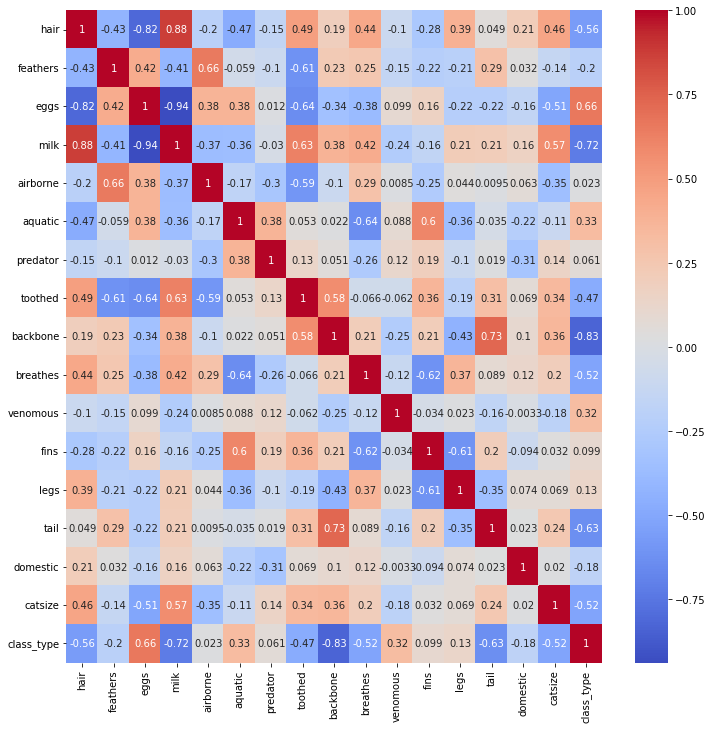

In [14]:
#checking for correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


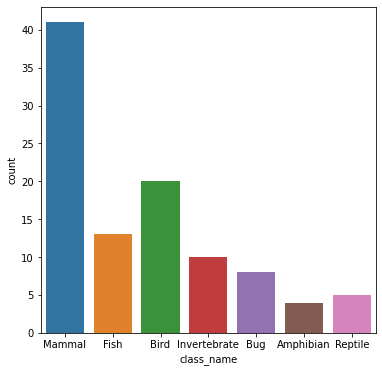

In [ ]:
#count of each class_type
plt.figure(figsize=(6,6))
sns.countplot('class_name',data=df)

In [ ]:
print('Count of each class name',df['class_name'].unique(),':','\n',df['class_name'].value_counts())

Count of each class name ['Mammal' 'Fish' 'Bird' 'Invertebrate' 'Bug' 'Amphibian' 'Reptile'] : 
 Mammal          41
Bird            20
Fish            13
Invertebrate    10
Bug              8
Reptile          5
Amphibian        4
Name: class_name, dtype: int64


# splitting the data

In [15]:
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
#splitting into target variable

#independent variables
x=df.iloc[:,:-1]

#target variable
y=df.iloc[:,-1]

#splitting into train test
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=23)

In [18]:

X_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
5,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
37,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,0
42,0,0,1,0,1,0,1,0,0,1,0,0,6,0,0,0
7,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
77,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
54,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
40,1,0,1,0,1,0,0,0,0,1,0,0,6,0,0,0


# knn implementation

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [21]:
X_train.shape

(70, 16)

In [ ]:
X_test


In [22]:
y_pred=knn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)

0.8064516129032258

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  2,  0,  0,  4,  0]])

In [36]:
a=np.array([1	,0,	0,	1,	0,	0,	0,	1,	1,	1,	0,	0,	4,	1,	1,	1]).reshape(1,-1)  #calf
b=np.array([0,	0,	1,	0,	0,	1,	1,	0,	0,	0,	0,	0,	6,	0,	0,	0]).reshape(1,-1) #crayfish

In [39]:
knn.predict(a)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

# Feature Scaling

In [ ]:
from sklearn.preprocessing  import StandardScaler

ss=StandardScaler()


x_scaled=ss.fit_transform(x)

#applying PCA

In [ ]:
from sklearn.decomposition import PCA
pc=PCA(0.99)
pc.fit(x_scaled)
x_pca=pc.transform(x_scaled)
x_pca

array([[-2.53525586, -0.26027764,  1.24184209, ..., -0.72565778,
        -0.53454067,  0.46003753],
       [-2.87735435, -0.40154709, -0.1000181 , ..., -0.14576514,
        -0.08788728, -0.01872462],
       [ 1.76100295,  3.70559205, -0.18010521, ..., -0.10851565,
         0.09026705,  0.24519814],
       ...,
       [-2.81897453,  0.10708083,  0.13685166, ..., -0.15929307,
         0.03629333, -0.03421561],
       [ 2.01881534, -1.25779288,  1.40920411, ...,  0.85549769,
         0.51389582, -0.50614542],
       [ 2.04997054, -1.90737976, -2.49732162, ..., -0.14043436,
        -0.2839426 ,  0.23108799]])

In [ ]:
x_pca.shape

(101, 14)

In [ ]:
pc.explained_variance_

array([4.71728026, 3.37467724, 2.38816089, 1.24324681, 0.96347757,
       0.75349382, 0.56844114, 0.5175513 , 0.4522704 , 0.38365316,
       0.28035829, 0.21283481, 0.13083722, 0.11912161])

In [ ]:
#splitting into train test
X_train,X_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.3,random_state=23)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()

knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9032258064516129

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0],
       [ 0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  3,  3]])

# K-fold cross validation

In [ ]:
from sklearn.model_selection import KFold

kf=KFold(10)

from sklearn.model_selection import cross_val_score

In [ ]:
score=cross_val_score(knn,X_train,y_train,cv=kf)

In [ ]:
score.mean()

0.8571428571428571